<a href="https://colab.research.google.com/github/AIandAutomationTools/ai-quartet-evaluator/blob/main/ai_quartet_cleaned_pitch_analysis_version42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎵 AI Quartet Pitch Analysis
This notebook compares a student's pitch to a professor's using a Google Drive MP3 link for each.

In [ ]:
# 📌 Provide your email and file URLs for evaluation

from IPython.display import display, HTML
from google.colab import output

# Global variables to store user input
email = ""
student_url = ""
professor_url = ""

# Callback function to receive inputs from JavaScript
def receive_user_input(e, s, p):
    global email, student_url, professor_url
    email = e.strip()
    student_url = s.strip()
    professor_url = p.strip()
    print(f"✅ Email: {email}")
    print(f"✅ Student URL: {student_url}")
    print(f"✅ Professor URL: {professor_url}")

# Register the callback
output.register_callback("notebook.receive_user_input", receive_user_input)

# HTML + JavaScript form
html_code = """
<div style="padding:20px; border:2px solid #ccc; border-radius:10px; max-width:600px;">
  <h3>🎵 Welcome to the AI Quartet Singing Evaluation</h3>
  <p>Please fill in the information below to begin:</p>

  <label><b>Your Email:</b></label><br>
  <input type="email" id="email" style="width:100%" placeholder="e.g. name@example.com"><br><br>

  <label><b>Student MP3 URL:</b></label><br>
  <input type="url" id="student_url" style="width:100%" placeholder="Paste the student file URL"><br><br>

  <label><b>Professor MP3 URL:</b></label><br>
  <input type="url" id="professor_url" style="width:100%" placeholder="Paste the professor file URL"><br><br>

  <button onclick="submitForm()" style="padding:10px 20px; font-size:16px;">Submit</button>
  <p id="status" style="margin-top:10px; font-weight:bold;"></p>
</div>

<script>
function submitForm() {
  const email = document.getElementById('email').value;
  const student = document.getElementById('student_url').value;
  const professor = document.getElementById('professor_url').value;

  if (!email || !student || !professor) {
    document.getElementById('status').innerText = "❌ Please fill in all fields.";
    document.getElementById('status').style.color = "red";
    return;
  }

  google.colab.kernel.invokeFunction('notebook.receive_user_input', [email, student, professor], {});
  document.getElementById('status').innerText = "✅ Submitted! You can now run the next cells.";
  document.getElementById('status').style.color = "green";
}
</script>
"""

# Show the form in notebook
display(HTML(html_code))



In [ ]:
print("Student URL:", student_url)
print("Professor URL:", professor_url)


Student URL: https://drive.google.com/uc?export=download&id=1_SrvD3ausP0bMxjEGWdgnckK1IxnXBcq
Professor URL: https://drive.google.com/uc?export=download&id=10f6-XmPGgYQ5onylkOXDy8KOUT528RPx


In [ ]:
# Example usage of student_url and professor_url
import librosa
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

def load_audio_from_url(url):
    print(f"🔗 Downloading audio from: {url}")
    response = requests.get(url)
    response.raise_for_status()
    audio_data = io.BytesIO(response.content)
    audio, sr = librosa.load(audio_data, sr=None)
    return audio, sr

# Load audio files
prof_audio, sr1 = load_audio_from_url(professor_url)
stud_audio, sr2 = load_audio_from_url(student_url)

# Continue with your pitch comparison logic...


🔗 Downloading audio from: https://drive.google.com/uc?export=download&id=10f6-XmPGgYQ5onylkOXDy8KOUT528RPx
🔗 Downloading audio from: https://drive.google.com/uc?export=download&id=1_SrvD3ausP0bMxjEGWdgnckK1IxnXBcq


In [ ]:
import time

# Wait up to 5 seconds for values to be set
for _ in range(10):
    if student_url and professor_url:
        break
    time.sleep(0.5)

# Check if values are present
if not student_url or not professor_url:
    raise ValueError("❌ Missing one or both URLs. Please ensure they are passed in the notebook link.")
else:
    print("✅ URLs successfully loaded.")
    print("Professor URL:", professor_url)
    print("Student URL:", student_url)


prof_audio, sr1 = load_audio_from_url(professor_url)
stud_audio, sr2 = load_audio_from_url(student_url)

# Resample if needed
if sr1 != sr2:
    stud_audio = librosa.resample(stud_audio, orig_sr=sr2, target_sr=sr1)
    sr2 = sr1

✅ URLs successfully loaded.
Professor URL: https://drive.google.com/uc?export=download&id=10f6-XmPGgYQ5onylkOXDy8KOUT528RPx
Student URL: https://drive.google.com/uc?export=download&id=1_SrvD3ausP0bMxjEGWdgnckK1IxnXBcq
🔗 Downloading audio from: https://drive.google.com/uc?export=download&id=10f6-XmPGgYQ5onylkOXDy8KOUT528RPx
🔗 Downloading audio from: https://drive.google.com/uc?export=download&id=1_SrvD3ausP0bMxjEGWdgnckK1IxnXBcq


In [ ]:
# Use yin for monophonic pitch detection
prof_pitch = librosa.yin(prof_audio, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), sr=sr1)
stud_pitch = librosa.yin(stud_audio, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), sr=sr2)

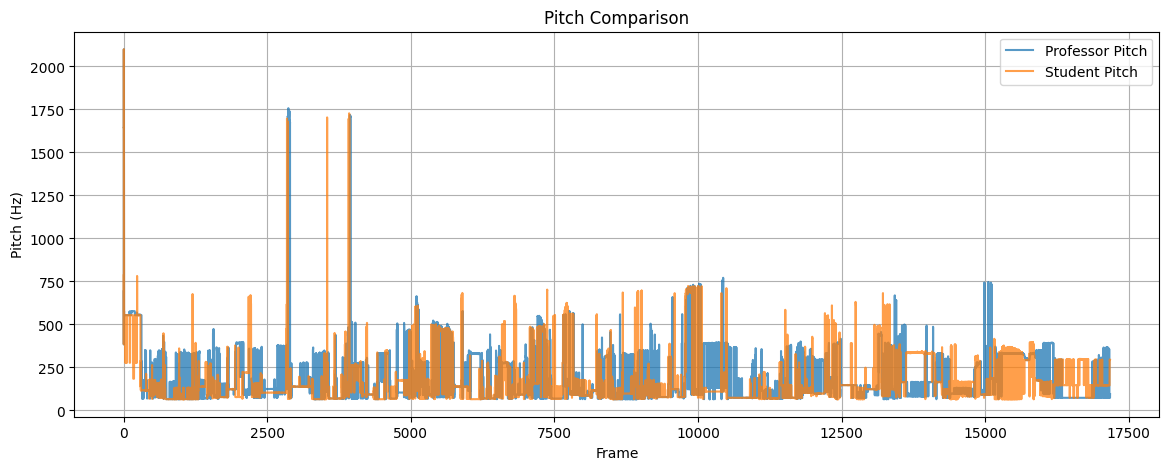

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(prof_pitch, label='Professor Pitch', alpha=0.75)
plt.plot(stud_pitch, label='Student Pitch', alpha=0.75)
plt.legend()
plt.title("Pitch Comparison")
plt.xlabel("Frame")
plt.ylabel("Pitch (Hz)")
plt.grid()
plt.show()

In [ ]:
prof_pitch_clean = np.nan_to_num(prof_pitch)
stud_pitch_clean = np.nan_to_num(stud_pitch)

# Ensure both pitch arrays are the same length
min_len = min(len(prof_pitch_clean), len(stud_pitch_clean))
prof_pitch_clean = prof_pitch_clean[:min_len]
stud_pitch_clean = stud_pitch_clean[:min_len]

# Now compute pitch difference
pitch_diff = np.abs(prof_pitch_clean - stud_pitch_clean)

pitch_diff = np.abs(prof_pitch_clean - stud_pitch_clean)
avg_error = np.mean(pitch_diff)

# Analyze pitch deviations over time
time_per_frame = len(stud_audio) / sr2 / len(stud_pitch_clean)
significant_errors = []

for i, diff in enumerate(pitch_diff):
    if diff > 50:  # Threshold for "significant" error
        timestamp = round(i * time_per_frame, 1)
        significant_errors.append(timestamp)

# Group timestamps into continuous segments
from itertools import groupby
from operator import itemgetter

segments = []
for k, g in groupby(enumerate(significant_errors), lambda x: x[0] - x[1]):
    group = list(map(itemgetter(1), g))
    if group:
        start = group[0]
        end = group[-1]
        if end - start >= 1.5:  # Only include segments > 1.5 seconds
            segments.append((start, end))

# Provide localized feedback
print("\n🎵 Average pitch difference: {:.2f} Hz".format(avg_error))

if segments:
    print("⚠️ Detailed pitch feedback (segments with >1.5s deviation):")
    for start, end in segments:
        print(f" - Pitch off between {start:.1f}s and {end:.1f}s")
elif avg_error > 100:
    print("⚠️ Pitch is consistently off — not just in isolated areas. Focus on tuning accuracy throughout the piece.")
else:
    print("✅ No major localized pitch issues detected.")


#print(f"\n🎵 Average pitch difference: {avg_error:.2f} Hz")
#if avg_error < 20:
  #  print("🎯 Great job! Your pitch closely matches the reference.")
#elif avg_error < 50:
    print("👍 You're in the ballpark, but there’s room for improvement.")
#else:
 #   print("⚠️ Your pitch deviates significantly. Focus on tuning and accuracy.")





🎵 Average pitch difference: 106.81 Hz
⚠️ Pitch is consistently off — not just in isolated areas. Focus on tuning accuracy throughout the piece.
